# Лабораторная работа №2

Вариант 8

## Первичный анализ данных

### Цель работы

- изучение программных средств для организации рабочего места специалиста по машинному обучению и анализу данных.

### Задачи

- получение программного доступа к данным, содержащимся в источниках различного типа;
- выполнение предварительного анализа данных и получение обобщенных характеристик наборов данных;
- исследование простых методов визуализации данных;
- изучение основных библиотек Python для работы с данными.

## Теоритические сведения

Карты пациентов с диабетом были получены из двух источников: автоматического электронного записывающего устройства и бумажных записей.  Автоматическое устройство имело внутренние часы, позволяющие фиксировать время событий, в то время как в бумажных записях были указаны только "логические временные" интервалы (завтрак, обед, ужин, сон).  Для бумажных записей фиксировалось время завтрака (08:00), обеда (12:00), ужина (18:00) и отхода ко сну (22:00).  Таким образом, бумажные записи имеют фиктивное единое время записи, в то время как электронные записи имеют более реалистичные временные метки.

## Описание набора данных

Датасет: Diabetes

Этот датасет описывает пациентов с инсулинозависимым сахарным диабетом (IDDM). Пациенты с IDDM сталкиваются с недостаточным количеством инсулина в организме, что может быть вызвано или низким/отсутствующим производством инсулина бета-клетками поджелудочной железы после аутоиммунного нападения, или инсулинорезистентностью, обычно связанной с возрастом и ожирением.

Датасет включает информацию о различных параметрах, таких как дозы инсулина, уровни глюкозы в крови, симптомы гипогликемии, пищевые приемы, физическая активность и другие события.

## Назначение набора данных

Цель: изучение и мониторинг пациентов с инсулинозависимым сахарным диабетом (IDDM)

Задачи, которые можно решать с использованием этого набора данных:
- Мониторинг уровня глюкозы: Датасет предоставляет информацию о различных измерениях уровня глюкозы в крови, что позволяет отслеживать колебания уровня сахара в течение дня.
- Оценка эффективности лечения: Информация о дозах инсулина и реакциях на них помогает оценить, насколько успешно пациент реагирует на лечение.
- Анализ влияния факторов на уровень глюкозы: Можно изучать влияние факторов, таких как пищевые приемы, физическая активность и симптомы гипогликемии на уровень глюкозы.
- Идентификация паттернов и трендов: Анализ данных может помочь выявить паттерны и тренды в поведении уровня глюкозы, что полезно для персонализированного подхода к лечению.

## Форма набора данных

- Количество элементов набора: Не указано, но можно подсчитать количество уникальных записей.
- Количество признаков: 4 (Дата, Время, Код, Значение).
- Количество пропущенных значений: Не указано, но необходимо провести анализ на наличие пропущенных данных.
- Среднее значение отдельных признаков, максимальные и минимальные значения:
    - Для признака "Дата" - анализ уникальных значений, определение периода данных.
    - Для признака "Время" - анализ уникальных значений, определение частоты измерений.
    - Для признака "Код" - подсчет уникальных значений, определение распределения видов кодов (например, количество инсулина, измерений глюкозы и т.д.).
    - Для признака "Значение" - статистика, такая как среднее, максимальное, минимальное значение, чтобы оценить диапазон данных.
    
Предположения, которые можно сделать, проведя первичный анализ:
- Данные вероятно содержат информацию о ежедневном режиме пациентов с сахарным диабетом, включая измерения глюкозы, приемы пищи, физическую активность и дозы инсулина.
- Значения кодов 58-63 представляют собой измерения уровня глюкозы до и после приемов пищи.
- Коды 33, 34 и 35 соответствуют различным дозам инсулина.
- Коды 65 представляют симптомы гипогликемии.

## Графические представления

- График временных рядов для измерений глюкозы:
    - Построим график временных рядов для измерений глюкозы (коды 48, 57, 58-63) для визуализации динамики уровня глюкозы в различные периоды суток.
- Гистограмма для кодов 33, 34, 35 (дозы инсулина):
    - Построим гистограмму, чтобы посмотреть распределение доз инсулина в наборе данных.
- Ящик с усами для измерений глюкозы до и после приемов пищи:
    - Это позволит оценить вариабельность уровня глюкозы в разные периоды суток.

In [3]:
!python -m ensurepip --default-pip
%pip install pandas

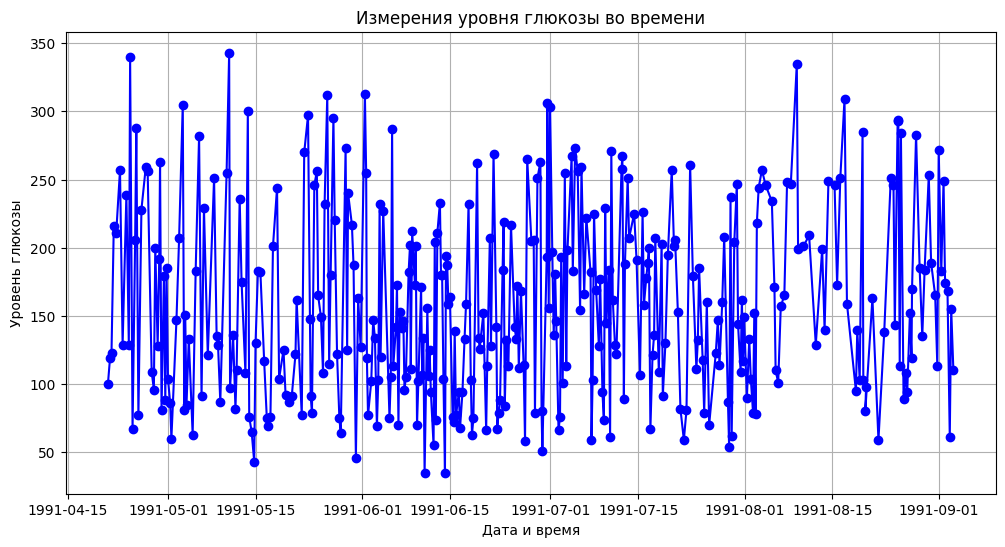

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных и создание таблицы
data_path = 'dataset/diabetes-data/data-01'
columns = ['Date', 'Time', 'Code', 'Value']
df = pd.read_csv(data_path, sep='\t', names=columns)

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Выборка измерения уровня глюкозы
glucose_measurements = df[df['Code'].isin([48, 57, 58, 59, 60, 61, 62, 63])]

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(glucose_measurements['DateTime'], glucose_measurements['Value'], marker='o', linestyle='-', color='b')
plt.title('Измерения уровня глюкозы во времени')
plt.xlabel('Дата и время')
plt.ylabel('Уровень глюкозы')
plt.grid(True)
plt.show()

График измерений уровня глюкозы в зависимости от времени предоставляет визуальное представление о динамике изменения уровня глюкозы в крови с течением времени. Некоторые возможные наблюдения и выводы:
- Тенденции в уровне глюкозы: График позволяет определить общие тенденции в изменении уровня глюкозы. Например, можно выявить периоды повышения или снижения уровня глюкозы.
- Паттерны в измерениях: Возможно обнаружение каких-то повторяющихся паттернов или циклических изменений уровня глюкозы, которые могут быть связаны с ежедневными или периодическими событиями.
- Аномалии или выбросы: График может помочь выявить необычные значения уровня глюкозы, которые могут указывать на аномалии в данных или требовать дополнительного внимания.
- События и их влияние: Если определены коды событий (столбец 'Code'), связанные с уровнем глюкозы, график может помочь в оценке влияния этих событий на уровень глюкозы.
- Изменения во времени суток: При анализе временной шкалы можно заметить, как изменяется уровень глюкозы в течение дня.

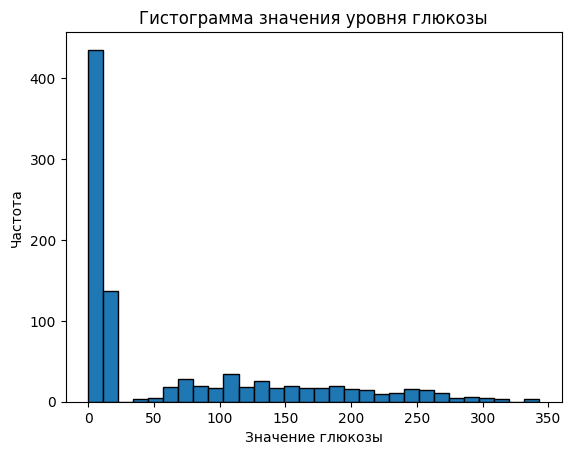

Количество элементов набора данных: 943
Количество признаков: 5
Количество пропущенных значений:
Date        0
Time        0
Code        0
Value       0
Datetime    0
dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/diabetes-data/data-01', sep='\t', header=None, names=['Date', 'Time', 'Code', 'Value'])
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m-%d-%Y %H:%M')

# Преобразуем значения в числа
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Гистограмма значений
plt.hist(df['Value'].dropna(), bins=30, edgecolor='black')
plt.title('Гистограмма значения уровня глюкозы')
plt.xlabel('Значение глюкозы')
plt.ylabel('Частота')
plt.show()

# Вывод информации о данных
num_entries = len(df)
print(f"Количество элементов набора данных: {num_entries}")
num_features = df.shape[1]
print(f"Количество признаков: {num_features}")
missing_values = df.isnull().sum()
print("Количество пропущенных значений:")
print(missing_values)


In [16]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.6 kB 544.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.6 kB 581.0 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.6 kB 708.1 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.6 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


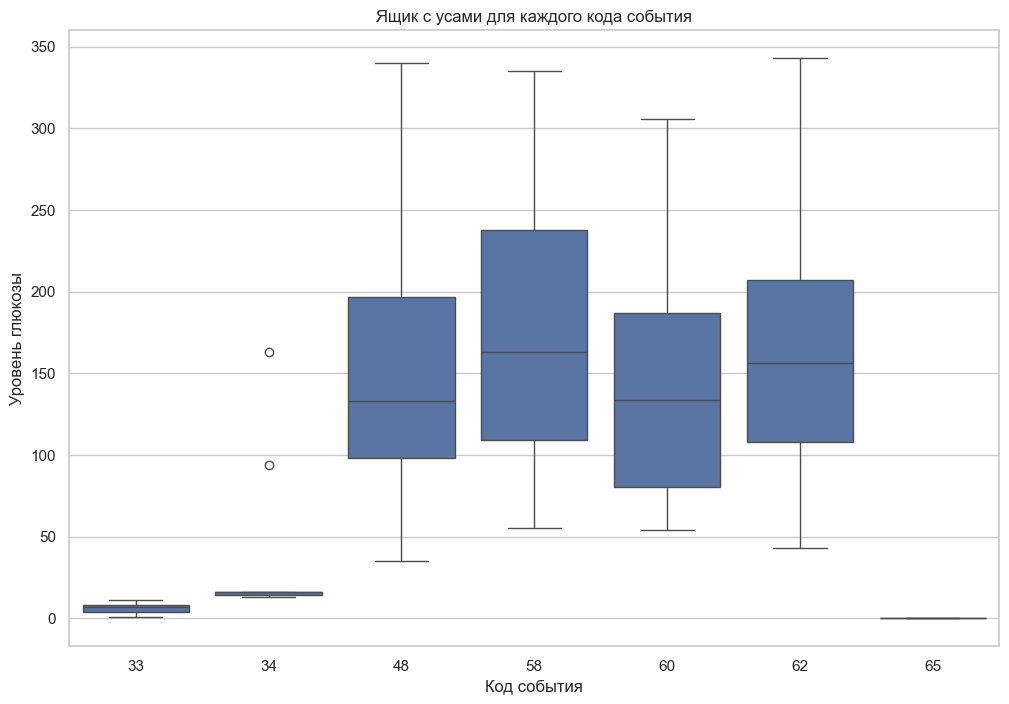

In [20]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='Code', y='Value', data=df)
plt.title('Ящик с усами для каждого кода события')
plt.xlabel('Код события')
plt.ylabel('Уровень глюкозы')
plt.show()

1) Медиана: Линия внутри ящика представляет медиану распределения уровня глюкозы для каждого типа события. Медиана дает представление о центре распределения.
2) Квартили (Q1, Q3): Границы ящика представляют первый (Q1) и третий (Q3) квартили. Это позволяет оценить интерквартильный размах, который охватывает основную часть данных.
3) Усы: Усы графика отображают диапазон данных, исключая выбросы. Они могут помочь определить разброс значений и наличие выбросов.
4) Выбросы: Отдельные точки за пределами усов могут быть интерпретированы как выбросы, необычные значения в данных.
5) Сравнение распределений: По сравнению ящиков с усами для разных кодов событий, можно выявить различия в распределениях уровня глюкозы. Например, разброс уровня глюкозы для одних типов событий может быть шире или уже, чем для других.

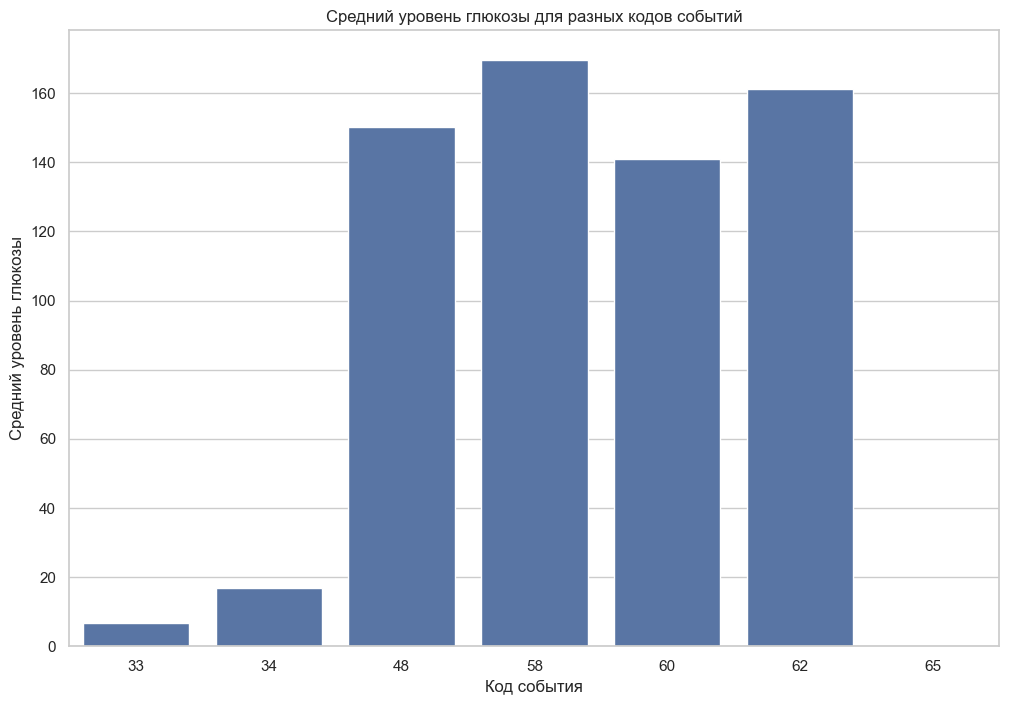

In [21]:
# Группировка данных по коду события и вычисление среднего уровня глюкозы
mean_glucose_by_code = df.groupby('Code')['Value'].mean().reset_index()

# График среднего уровня глюкозы для разных кодов событий
plt.figure(figsize=(12, 8))
sns.barplot(x='Code', y='Value', data=mean_glucose_by_code)
plt.title('Средний уровень глюкозы для разных кодов событий')
plt.xlabel('Код события')
plt.ylabel('Средний уровень глюкозы')
plt.show()


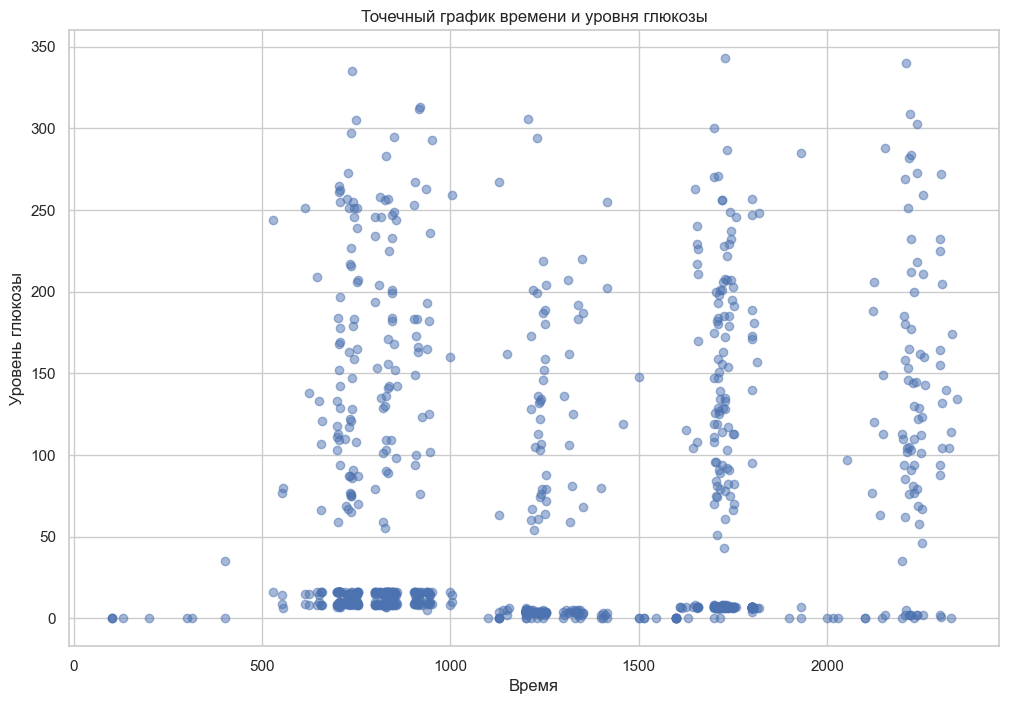

In [22]:
# Преобразование времени в числовой формат
df['Time_numeric'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour * 100 + pd.to_datetime(df['Time'], format='%H:%M').dt.minute

# Точечный график времени и уровня глюкозы
plt.figure(figsize=(12, 8))
plt.scatter(df['Time_numeric'], df['Value'], alpha=0.5)
plt.title('Точечный график времени и уровня глюкозы')
plt.xlabel('Время')
plt.ylabel('Уровень глюкозы')
plt.show()


Точечный график времени и уровня глюкозы полезен для визуализации связи.
- Тенденции в течение дня: Мы можем увидеть, как меняется уровень глюкозы в зависимости от времени суток. Это может помочь выявить паттерны и тенденции, такие как пики или спады, которые могут быть связаны с приемом пищи, физической активностью или другими факторами.
- Идентификация выбросов: Точечный график также может помочь выявить необычные значения или выбросы в данных. Если есть отдельные точки, значительно отклоняющиеся от общего тренда, это может быть интересным объектом для дополнительного анализа.

## Контрольные вопросы

### Инструментальные средства для организации рабочего места специалиста Data Science:
- Jupyter Notebooks: Интерактивная среда для программирования, визуализации данных и создания отчетов. Удобна для шагов анализа данных и презентации результатов.
- Anaconda: Пакетный менеджер и дистрибутив, который упрощает установку и управление популярными библиотеками для анализа данных.
- Git: Для управления версиями кода и совместной разработки.
- SQL: Знание SQL важно для работы с базами данных, где хранятся большие объемы данных.    

### Библиотеки Python для машинного обучения:
- NumPy: Библиотека для работы с многомерными массивами данных. Предоставляет функционал для математических операций.
- Pandas: Используется для работы с табличными данными. Обеспечивает структуры данных для эффективного анализа данных.
- Matplotlib и Seaborn: Для визуализации данных. Matplotlib предоставляет базовые графические возможности, а Seaborn упрощает создание красочных статистических графиков.
- Scikit-learn: Широко используемая библиотека для машинного обучения. Содержит инструменты для классификации, регрессии, кластеризации, а также инструменты для предобработки данных и оценки моделей.
- TensorFlow и PyTorch: Библиотеки для глубокого обучения. Позволяют создавать и обучать нейронные сети.

### Почему Python для машинного обучения?
- Обширная Экосистема: Python имеет огромное количество библиотек и фреймворков для машинного обучения, что делает его мощным инструментом.
- Простота Использования: Python обладает простым и читаемым синтаксисом, что упрощает разработку кода и обучение новичков.
- Сообщество: Python активно используется в области анализа данных и машинного обучения. Обширное сообщество разработчиков предоставляет множество ресурсов и поддержку.
- Интеграция с Большинством Баз Данных и Веб-Фреймворками: Python легко интегрируется с различными источниками данных и используется в веб-разработке.